In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

axis =1 ..is for columns

In [5]:
df = df.drop(columns=["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1)

In [6]:
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype =="object":
    df[col]=le.fit_transform(df[col])

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [8]:
target = df["Attrition"]
x=df.drop(columns = ["Attrition"],axis=1)

In [9]:
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [10]:
target.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

stratify purpose is to get balanced classes in test and train

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=7,stratify = target)

In [12]:
x_train.shape

(1176, 30)

In [13]:
y_train.shape

(1176,)

In [14]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
y_pred = tree.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.41      0.47      0.44        47

    accuracy                           0.81       294
   macro avg       0.65      0.67      0.66       294
weighted avg       0.82      0.81      0.81       294



In [17]:
from sklearn.metrics import accuracy_score,classification_report

def classification_performance(model,features,target,dataset_name):
  print(f"{dataset_name} data performance")
  print()

  predicted_target = model.predict(features)
  report = pd.DataFrame(classification_report(target,predicted_target,output_dict=True))

  print(report)
  print()
  print("Accuracy score :",accuracy_score(target,predicted_target) *100)

In [18]:
# import pandas as pd

# # Creating a dictionary with sample data
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
#     'Age': [25, 30, 35, 28, 32],
#     'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Boston']
# }

# # Creating a DataFrame from the dictionary
# df = pd.DataFrame(data)

# # Displaying the DataFrame
# print(df)


In [19]:
from sklearn.model_selection import KFold,cross_val_score

def kfold_cross_validation_score(model,features,target):
  kfold = KFold(n_splits=10)

  result = cross_val_score(model,features,target,cv=kfold,scorings="accuracy")

  print(f"k-fold accuracy mean",round(result.mean()*100,2))
  print("k-fold acuuracy standard deviation:",round(result.std()*100,2))

In [20]:
classification_performance(tree,x_train,y_train,"training")

training data performance

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    986.0  190.0       1.0     1176.0        1176.0

Accuracy score : 100.0


In [21]:
classification_performance(tree,x_test,y_test,"testing")

testing data performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.895833   0.407407  0.806122    0.651620      0.817752
recall       0.870445   0.468085  0.806122    0.669265      0.806122
f1-score     0.882957   0.435644  0.806122    0.659300      0.811448
support    247.000000  47.000000  0.806122  294.000000    294.000000

Accuracy score : 80.61224489795919


In [35]:
rf_classifier=RandomForestClassifier(n_estimators=25 ,
                                     criterion = "gini",
                                     max_depth = 10,
                                     min_impurity_decrease=0.01,  #even 0.01 gini loss reduction is acceptable
                                     max_features=6, #how many features you are sampling from the sub samples
                                     max_samples = 1.0,
                                     class_weight="balanced",
                                     random_state=7
                                     )

In [32]:
rf_model = rf_classifier.fit(x_train,y_train)

In [33]:
classification_performance(rf_classifier,x_train,y_train,"training")

training data performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.937642    0.459184  0.818027     0.698413      0.860340
recall       0.838742    0.710526  0.818027     0.774634      0.818027
f1-score     0.885439    0.557851  0.818027     0.721645      0.832512
support    986.000000  190.000000  0.818027  1176.000000   1176.000000

Accuracy score : 81.80272108843538


In [34]:
classification_performance(rf_classifier,x_test,y_test,"testing")

testing data performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.910314   0.380282  0.782313    0.645298      0.825581
recall       0.821862   0.574468  0.782313    0.698165      0.782313
f1-score     0.863830   0.457627  0.782313    0.660728      0.798893
support    247.000000  47.000000  0.782313  294.000000    294.000000

Accuracy score : 78.2312925170068


In [44]:
#grid
params = {
    "n_estimators" : [25,50,75,100],
    "criterion" : ["entropy","gini"],
    "max_depth": [5,10,12,15],
    "max_features" : [5,6,7,8]
}

#combination of parameters it will try is 4*2*4*4=128

In [45]:
grid_model = GridSearchCV(RandomForestClassifier(),
                          param_grid=params,
                          cv=10,
                          verbose=3, #prints some intermediate values
                          n_jobs=-1   #server
                          )

In [46]:
grid_model.fit(x_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 12, 15],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=3)

In [47]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=7)

In [48]:
print(grid_model.best_score_)

0.8631102419238014


In [49]:
rf_classifier=RandomForestClassifier(n_estimators=25 ,
                                     criterion = "entropy",
                                     max_depth = 10,
                                     min_impurity_decrease=0.01,  #even 0.01 gini loss reduction is acceptable
                                     max_features=7, #how many features you are sampling from the sub samples
                                     max_samples = 1.0,
                                     class_weight="balanced",
                                     random_state=7
                                     )


rf_model = rf_classifier.fit(x_train,y_train)

classification_performance(rf_classifier,x_train,y_train,"training")

training data performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.953463    0.583333   0.87415     0.768398      0.893663
recall       0.893509    0.773684   0.87415     0.833597      0.874150
f1-score     0.922513    0.665158   0.87415     0.793836      0.880934
support    986.000000  190.000000   0.87415  1176.000000   1176.000000

Accuracy score : 87.41496598639455


In [50]:
classification_performance(rf_classifier,x_test,y_test,"testing")

testing data performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.914163   0.442623  0.816327    0.678393      0.838781
recall       0.862348   0.574468  0.816327    0.718408      0.816327
f1-score     0.887500   0.500000  0.816327    0.693750      0.825553
support    247.000000  47.000000  0.816327  294.000000    294.000000

Accuracy score : 81.63265306122449


In [53]:
random_model = RandomizedSearchCV(RandomForestClassifier(),
                                scoring="f1",
                                param_distributions=params,
                                cv=5,
                                verbose=1, #prints some intermediate values
                                n_jobs=-1   #server
                                )

In [55]:
random_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 12, 15],
                                        'max_features': [5, 6, 7, 8],
                                        'n_estimators': [25, 50, 75, 100]},
                   scoring='f1', verbose=1)

In [56]:
random_model.best_estimator_

RandomForestClassifier(max_depth=15, max_features=5, n_estimators=25)

In [58]:
rf_classifier=RandomForestClassifier(n_estimators=25 ,
                                     criterion = "entropy",
                                     max_depth = 15,
                                     min_impurity_decrease=0.01,  #even 0.01 gini loss reduction is acceptable
                                     max_features=5, #how many features you are sampling from the sub samples
                                     max_samples = 1.0,
                                     class_weight="balanced",
                                     random_state=7
                                     )


rf_model = rf_classifier.fit(x_train,y_train)

classification_performance(rf_classifier,x_train,y_train,"training")

training data performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.950562    0.510490  0.843537     0.730526      0.879462
recall       0.858012    0.768421  0.843537     0.813217      0.843537
f1-score     0.901919    0.613445  0.843537     0.757682      0.855312
support    986.000000  190.000000  0.843537  1176.000000   1176.000000

Accuracy score : 84.35374149659864


In [59]:
classification_performance(rf_classifier,x_test,y_test,"testing")

testing data performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.915179   0.400000  0.792517    0.657589      0.832820
recall       0.829960   0.595745  0.792517    0.712852      0.792517
f1-score     0.870488   0.478632  0.792517    0.674560      0.807845
support    247.000000  47.000000  0.792517  294.000000    294.000000

Accuracy score : 79.25170068027211


In [60]:
import pickle
filename = "finalized_model"
pickle.dump(rf_model,open(filename,"wb"))

In [61]:
loaded_model = pickle.load(open(filename,"rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.7925170068027211


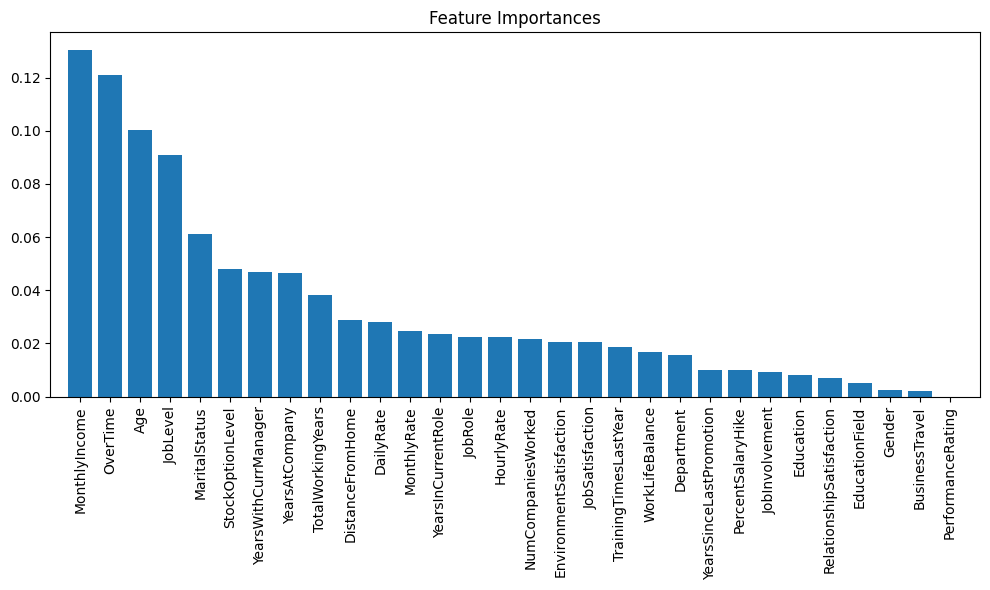

In [63]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Get the names of features/columns
feature_names = list(x_train.columns)  # Assuming x_train is your feature DataFrame

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()